# Measuring the Temperature of the Universe with SciPy's fmin
We will fit the [Planck](https://en.wikipedia.org/wiki/Planck_(spacecraft)) data to a [Plank spectrum](https://en.wikipedia.org/wiki/Black-body_radiation). 

## What is the CMB
The CMB is the [cosmic microwave background radiation](https://en.wikipedia.org/wiki/Cosmic_microwave_background). The CMB is radiation that originated when the universe was very young, a few hundred thousand years after the Big Bang. The CMB is nearly a perfect [blackbody](https://en.wikipedia.org/wiki/Black-body_radiation) with a temperature of approximately 2.7 Kelvin, which corresponds to the peak wavelength of the blackbody spectrum. However, there are small fluctuations in the temperature, called anisotropies. These fluctuations are incredibly rich, providing information about the early universe and matter distribution. We will focus on the blackbody nature of the CMB in this notebook, though. 


The Black-Body spectral radiance (the power per unit solid angle, per unit of area normal to the propagation) is 
\begin{align} 
B_\nu(T) = \frac{2 h }{\nu^3}\frac{ c^2}{e^{hc\nu/kT} - 1}  \tag{1} 
\end{align}
where we have the following constants and variables: 
* Planck's constant $h = 6.62607015\times10^{-34}~J/s$ (has units of Joules per second)
* Boltzmann constant, $k=1.380649 \times 10^{23}~J/K$ (has units of Joules per Kelvin)
* speed of light $c=3\times10^8 ~m/s$
* the frequency $\nu$ (has units of Hertz, Hz) 
* the temperature $T$ (has units of Kelvin, K)

## CMB data
The CMB data is provided to you as a .data file; planck.data. This file has two columns: the first is the frequency and the second is the spectral radiance. 

## Fitting the CMB 
To fit the data we will use fmin and the mean squared error objective function, 
\begin{align} 
\Phi(T) = \frac{1}{N_{data}} \sum_{N_{data}} ( B_\nu(T)  - B_\nu^{measured})^2. \tag{2} 
\end{align}
Our objective is to minimize this function, i.e. find the value of $T$ that makes this function as small as possible. We should note some properties of the objective function: 1) it is zero when the predicted value matches the measured value, 2) it is never negative, and 3) as the fit gets worse, the objective function "gets larger." 

## Obtaining the constants and the funky units of the Planck data
* SciPy has a package called constants that provides $h$, $c$, and $k$, as well as other scientific constants. 
* The units in the Planck data are a bit odd. Frequency is measured in per centimeter. So, to get the units into Hertz we need to multiply the Planck frequency (the first column in the data) by $100\times c$. 
* The spectral radiance is in [Mega Janksy](https://en.wikipedia.org/wiki/Jansky) per [steridian](https://en.wikipedia.org/wiki/Steradian). To get the units right here requires multiplying the second column in the data by $10\times{-20}$


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# import optimizer and rosen function 
from scipy.optimize import fmin, rosen
from scipy.constants import h, c, k, pi

MJy = 1e-26*1e6 

In [2]:
#load CMB data
planck=np.loadtxt("planck.data") 
planck.shape

(43, 2)

In [3]:
# Planck's law for blackbody radiation
def blackbody_spectrum(nu, T):
    return (2 * h * nu**3 / c**2) * (1 / (np.exp((h *nu) / (k * T)) - 1))

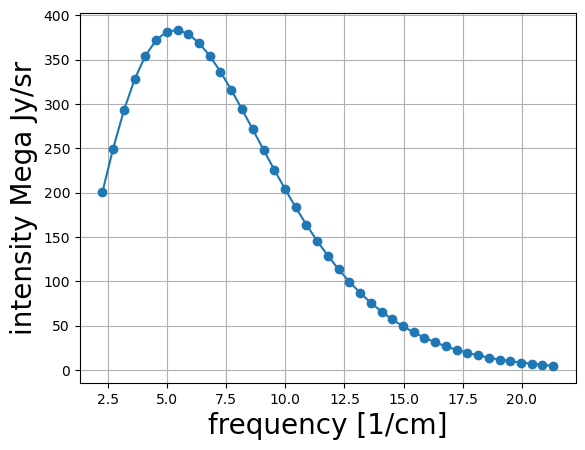

In [4]:
nu=planck[:,0]
B=planck[:,1]

ax=plt.subplot()
ax.set_xlabel("frequency [1/cm]",size=20) 
ax.set_ylabel("intensity Mega Jy/sr", size=20) 
ax.plot(nu, B, "o-")
ax.grid()

In [ ]:
Make a plot of multiple models over various temperatures 

In [5]:
# array of frequencies in units of Hertz
# needed for black body function 
f=nu*c*100

def objective(T):
    
    I = blackbody_spectrum(f, T)
    I = I/MJy # scale by Mega Jansky
    
    return np.mean((I - B)**2) 

T_fit=fmin(objective, 5) 
print("fitted temperature", T_fit) 

Optimization terminated successfully.
         Current function value: 0.005174
         Iterations: 18
         Function evaluations: 36
fitted temperature [2.72503662]


In [6]:
T_fit=fmin(objective, [1]) 
T_fit=fmin(objective, T_fit) 
print("fitted temperature ", T_fit) 
B_fit=blackbody_spectrum(f,T_fit)/MJy

Optimization terminated successfully.
         Current function value: 0.005138
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.005138
         Iterations: 13
         Function evaluations: 26
fitted temperature  [2.725]


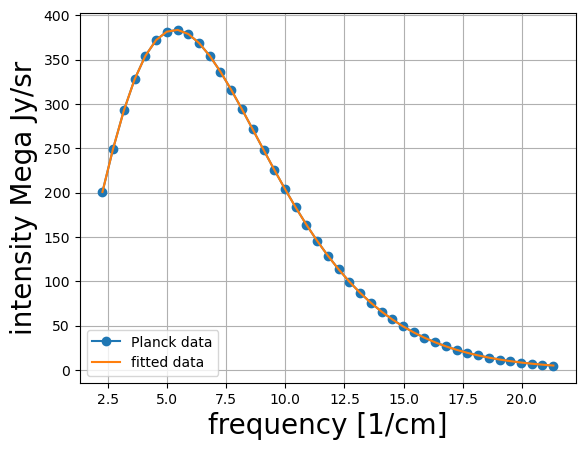

In [7]:
ax=plt.subplot()
ax.set_xlabel("frequency [1/cm]",size=20) 
ax.set_ylabel("intensity Mega Jy/sr", size=20) 
ax.plot(nu, B, "o-", label="Planck data")
ax.plot(nu, B_fit, label ="fitted data") 
ax.grid()
ax.legend(loc=3) 